In [1]:
import json
import matplotlib.pyplot as plt


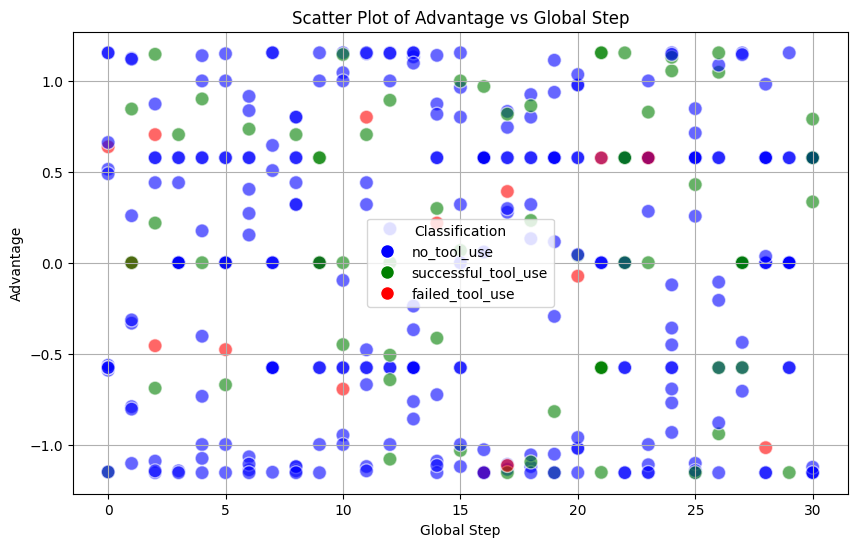

In [2]:
# Load the data from the JSONL file
file_path = "/millcreek/home/sunil/r1_vlm/src/r1_vlm/environments/tool_use_text_vqa_env/tool_use_metrics.jsonl"
datapoints = []
with open(file_path, "r") as f:
    for line in f:
        data_point = json.loads(line)
        datapoints.append(data_point)

# Prepare data for plotting
global_steps = [dp["global_step"] for dp in datapoints]
advantages = [dp["advantage"] for dp in datapoints]
classifications = [dp["classification"] for dp in datapoints]

# Define colors for each classification
colors = {
    "no_tool_use": "blue",
    "successful_tool_use": "green",
    "failed_tool_use": "red",
}
color_values = [colors[cls] for cls in classifications]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(global_steps, advantages, c=color_values, alpha=0.6, edgecolors="w", s=100)

# Add labels and title
plt.xlabel("Global Step")
plt.ylabel("Advantage")
plt.title("Scatter Plot of Advantage vs Global Step")
plt.grid(True)

# Add a legend
legend_labels = {v: k for k, v in colors.items()}
handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=legend_labels[color],
        markerfacecolor=color,
        markersize=10,
    )
    for color in colors.values()
]
plt.legend(handles=handles, title="Classification")

# Show the plot
plt.show()

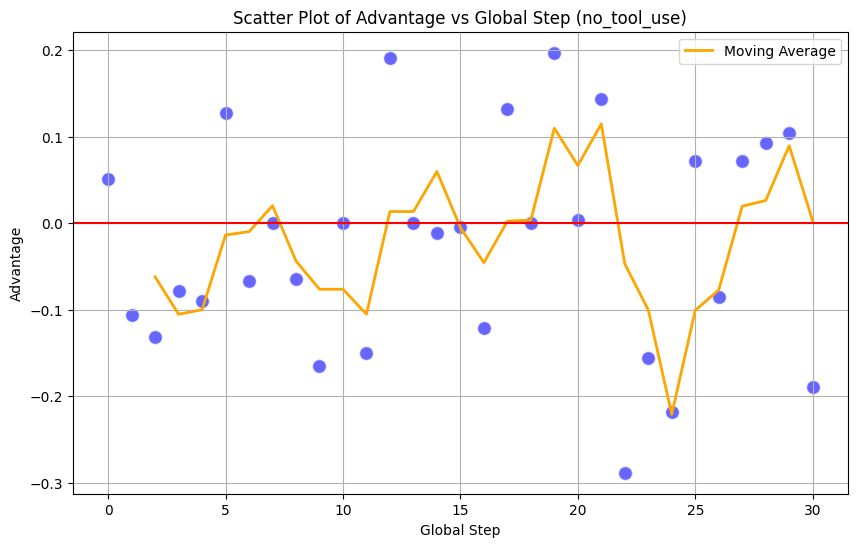

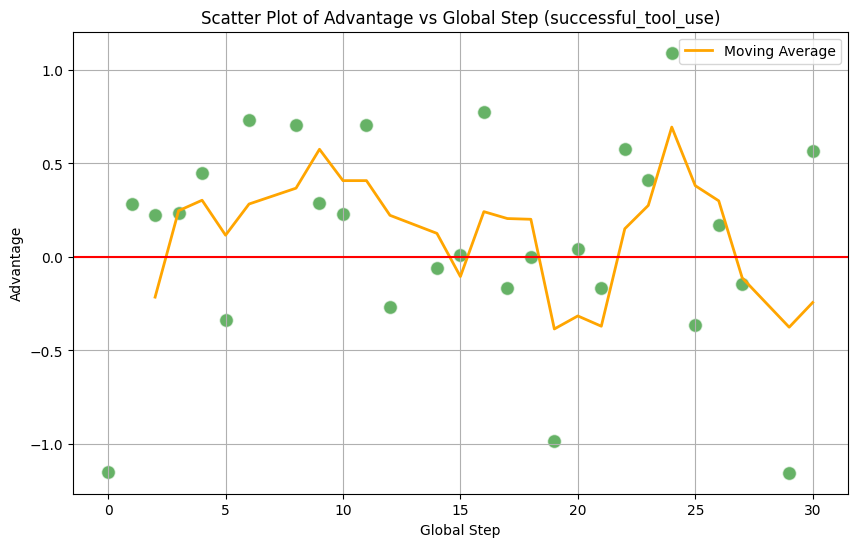

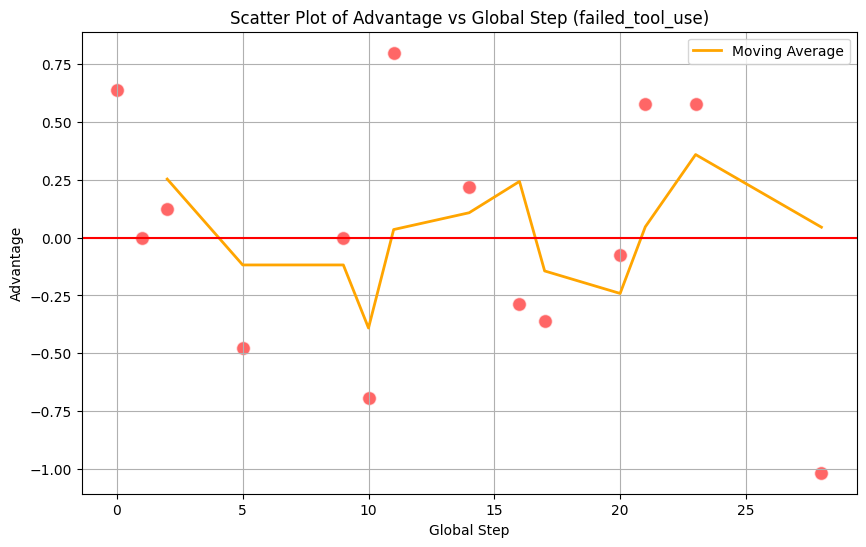

In [3]:
# Separate data by classification
data_by_classification = {
    "no_tool_use": [],
    "successful_tool_use": [],
    "failed_tool_use": [],
}

for dp in datapoints:
    data_by_classification[dp["classification"]].append(dp)

from collections import defaultdict
import numpy as np


def moving_average(data, window_size):
    """Calculate the moving average of a list of numbers."""
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")


# Define the window size for the moving average
window_size = 5

# Plot each classification separately with a moving average line
for classification, data in data_by_classification.items():
    # Aggregate data by global step
    step_advantages = defaultdict(list)
    for dp in data:
        step_advantages[dp["global_step"]].append(dp["advantage"])

    # Calculate average advantage for each step
    averaged_steps = sorted(step_advantages.keys())
    averaged_advantages = [np.mean(step_advantages[step]) for step in averaged_steps]

    color = colors[classification]

    plt.figure(figsize=(10, 6))
    plt.scatter(
        averaged_steps, averaged_advantages, c=color, alpha=0.6, edgecolors="w", s=100
    )

    # Calculate and plot the moving average
    if len(averaged_advantages) >= window_size:
        ma_advantages = moving_average(averaged_advantages, window_size)
        ma_steps = averaged_steps[
            window_size - 1 :
        ]  # Align the steps with the moving average
        plt.plot(
            ma_steps, ma_advantages, color="orange", linewidth=2, label="Moving Average"
        )

    # Add labels and title
    plt.xlabel("Global Step")
    plt.ylabel("Advantage")
    plt.title(f"Scatter Plot of Advantage vs Global Step ({classification})")
    plt.grid(True)
    plt.legend()

    # Customize the x-axis line color
    ax = plt.gca()  # Get current axis
    ax.axhline(0, color="red", linewidth=1.5)  # Draw a red line at y=0

    # Show the plot
    plt.show()